<a href="https://colab.research.google.com/github/Mustafailhann/custom/blob/main/cooin_tahmin_modeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Veriyi yükleme
from google.colab import files
uploaded = files.upload()


Saving BTCUSDT.csv to BTCUSDT.csv


In [ ]:

# CSV dosyasını oku
df = pd.read_csv('BTCUSDT.csv')

print(df.head())
print("**************")
print(df.shape)

       Open time      Open      High       Low     Close      Volume  \
0  1640995200000  46216.93  46949.99  46208.37  46813.20  3495.20465   
1  1641009600000  46813.21  47555.55  46591.23  47194.73  3522.79888   
2  1641024000000  47194.73  47344.69  46715.39  46758.87  2729.67811   
3  1641038400000  46758.87  47491.14  46756.30  47219.04  3055.90946   
4  1641052800000  47219.04  47954.63  47186.07  47329.78  4061.67681   

      Close time   Quote asset volume   Number of trades  \
0  1641009599999         1.630911e+08             114726   
1  1641023999999         1.658017e+08             115150   
2  1641038399999         1.283084e+08             109398   
3  1641052799999         1.439909e+08             109116   
4  1641067199999         1.930028e+08             154496   

    Taker buy base asset volume   Taker buy quote asset volume   Ignore  
0                    1751.87928                   8.171741e+07        0  
1                    1764.44663                   8.306308

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Open time                      4927 non-null   int64  
 1    Open                          4927 non-null   float64
 2    High                          4927 non-null   float64
 3    Low                           4927 non-null   float64
 4    Close                         4927 non-null   float64
 5    Volume                        4927 non-null   float64
 6    Close time                    4927 non-null   int64  
 7    Quote asset volume            4927 non-null   float64
 8    Number of trades              4927 non-null   int64  
 9    Taker buy base asset volume   4927 non-null   float64
 10   Taker buy quote asset volume  4927 non-null   float64
 11   Ignore                        4927 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 462.0 KB
N

In [ ]:
print(df.isnull().sum())

Open time                        0
 Open                            0
 High                            0
 Low                             0
 Close                           0
 Volume                          0
 Close time                      0
 Quote asset volume              0
 Number of trades                0
 Taker buy base asset volume     0
 Taker buy quote asset volume    0
 Ignore                          0
dtype: int64


In [ ]:
import datetime

df['tarih'] = df['Open time'] / 1000  # Unix zaman damgasını saniyeye çevir
df['tarih'] = df['tarih'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%B %Y'))  # Tarihi al

print(df["tarih"].head())
print("*********")
print(df["tarih"].tail())


0    January 2022
1    January 2022
2    January 2022
3    January 2022
4    January 2022
Name: tarih, dtype: object
*********
4922    March 2024
4923    March 2024
4924    March 2024
4925    March 2024
4926    April 2024
Name: tarih, dtype: object


In [ ]:
fiyat = df[" Close"].values.reshape(-1, 1)

print(fiyat)

[[46813.2 ]
 [47194.73]
 [46758.87]
 ...
 [71023.5 ]
 [71280.01]
 [70588.01]]


In [ ]:

# Veriyi ölçeklendirme (0-1 aralığına getirme)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(fiyat)

# Eğitim ve test veri setlerini oluşturma
train_size = int(len(scaled_prices) * 0.7)
test_size = len(scaled_prices) - train_size
train_data, test_data = scaled_prices[0:train_size, :], scaled_prices[train_size:len(scaled_prices), :]

print(train_size)
print(test_size)
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)
print("*******************")
print(train_data)
print(test_data)


3448
1479
*******************
             0
0     0.539515
1     0.546136
2     0.538572
3     0.546557
4     0.548479
...        ...
3443  0.235850
3444  0.236852
3445  0.235518
3446  0.235035
3447  0.235472

[3448 rows x 1 columns]
             0
0     0.236265
1     0.236523
2     0.235864
3     0.235506
4     0.235848
...        ...
1474  0.948300
1475  0.948494
1476  0.959641
1477  0.964092
1478  0.952084

[1479 rows x 1 columns]


In [ ]:
# Zaman serisi verilerini X ve y olarak dönüştürme
def dataset_olustur(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X_train, y_train = dataset_olustur(train_data, time_step)
X_test, y_test = dataset_olustur(test_data, time_step)
print(X_train,"*******",y_train)
print("\n")
print(X_test,"*******",y_test)



[[0.5395148  0.54613556 0.538572   ... 0.4673746  0.46763975 0.46427931]
 [0.54613556 0.538572   0.54655742 ... 0.46763975 0.46427931 0.46012582]
 [0.538572   0.54655742 0.54847911 ... 0.46427931 0.46012582 0.45948913]
 ...
 [0.2612224  0.25685599 0.2527405  ... 0.23713165 0.23588239 0.23585011]
 [0.25685599 0.2527405  0.2543462  ... 0.23588239 0.23585011 0.23685226]
 [0.2527405  0.2543462  0.25292341 ... 0.23585011 0.23685226 0.23551815]] ******* [0.46012582 0.45948913 0.45669388 ... 0.23685226 0.23551815 0.23503486]


[[0.23626451 0.23652272 0.23586365 ... 0.23787679 0.23737494 0.23749346]
 [0.23652272 0.23586365 0.235506   ... 0.23737494 0.23749346 0.23675005]
 [0.23586365 0.235506   0.23584768 ... 0.23749346 0.23675005 0.2361715 ]
 ...
 [0.96598252 0.91106086 0.91495284 ... 0.94043289 0.94711595 0.94830048]
 [0.91106086 0.91495284 0.90296993 ... 0.94711595 0.94830048 0.94849379]
 [0.91495284 0.90296993 0.90989924 ... 0.94830048 0.94849379 0.95964097]] ******* [0.23675005 0.2361715 

In [ ]:
# LSTM modeli oluşturma
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Test veri seti üzerinde tahmin yapma
fiyat_tahmini = model.predict(X_test)
fiyat_tahmini = scaler.inverse_transform(fiyat_tahmini)


Epoch 1/100
105/105 [==============================] - 24s 130ms/step - loss: 0.0044
Epoch 2/100
105/105 [==============================] - 15s 145ms/step - loss: 2.4553e-04
Epoch 3/100
105/105 [==============================] - 13s 123ms/step - loss: 2.2253e-04
Epoch 4/100
105/105 [==============================] - 14s 138ms/step - loss: 2.0201e-04
Epoch 5/100
105/105 [==============================] - 12s 114ms/step - loss: 1.9282e-04
Epoch 6/100
105/105 [==============================] - 8s 75ms/step - loss: 1.8776e-04
Epoch 7/100
105/105 [==============================] - 10s 93ms/step - loss: 1.9021e-04
Epoch 8/100
105/105 [==============================] - 10s 94ms/step - loss: 1.6049e-04
Epoch 9/100
105/105 [==============================] - 8s 76ms/step - loss: 1.6537e-04
Epoch 10/100
105/105 [==============================] - 9s 88ms/step - loss: 1.4917e-04
Epoch 11/100
105/105 [==============================] - 9s 88ms/step - loss: 1.4391e-04
Epoch 12/100
105/105 [===========

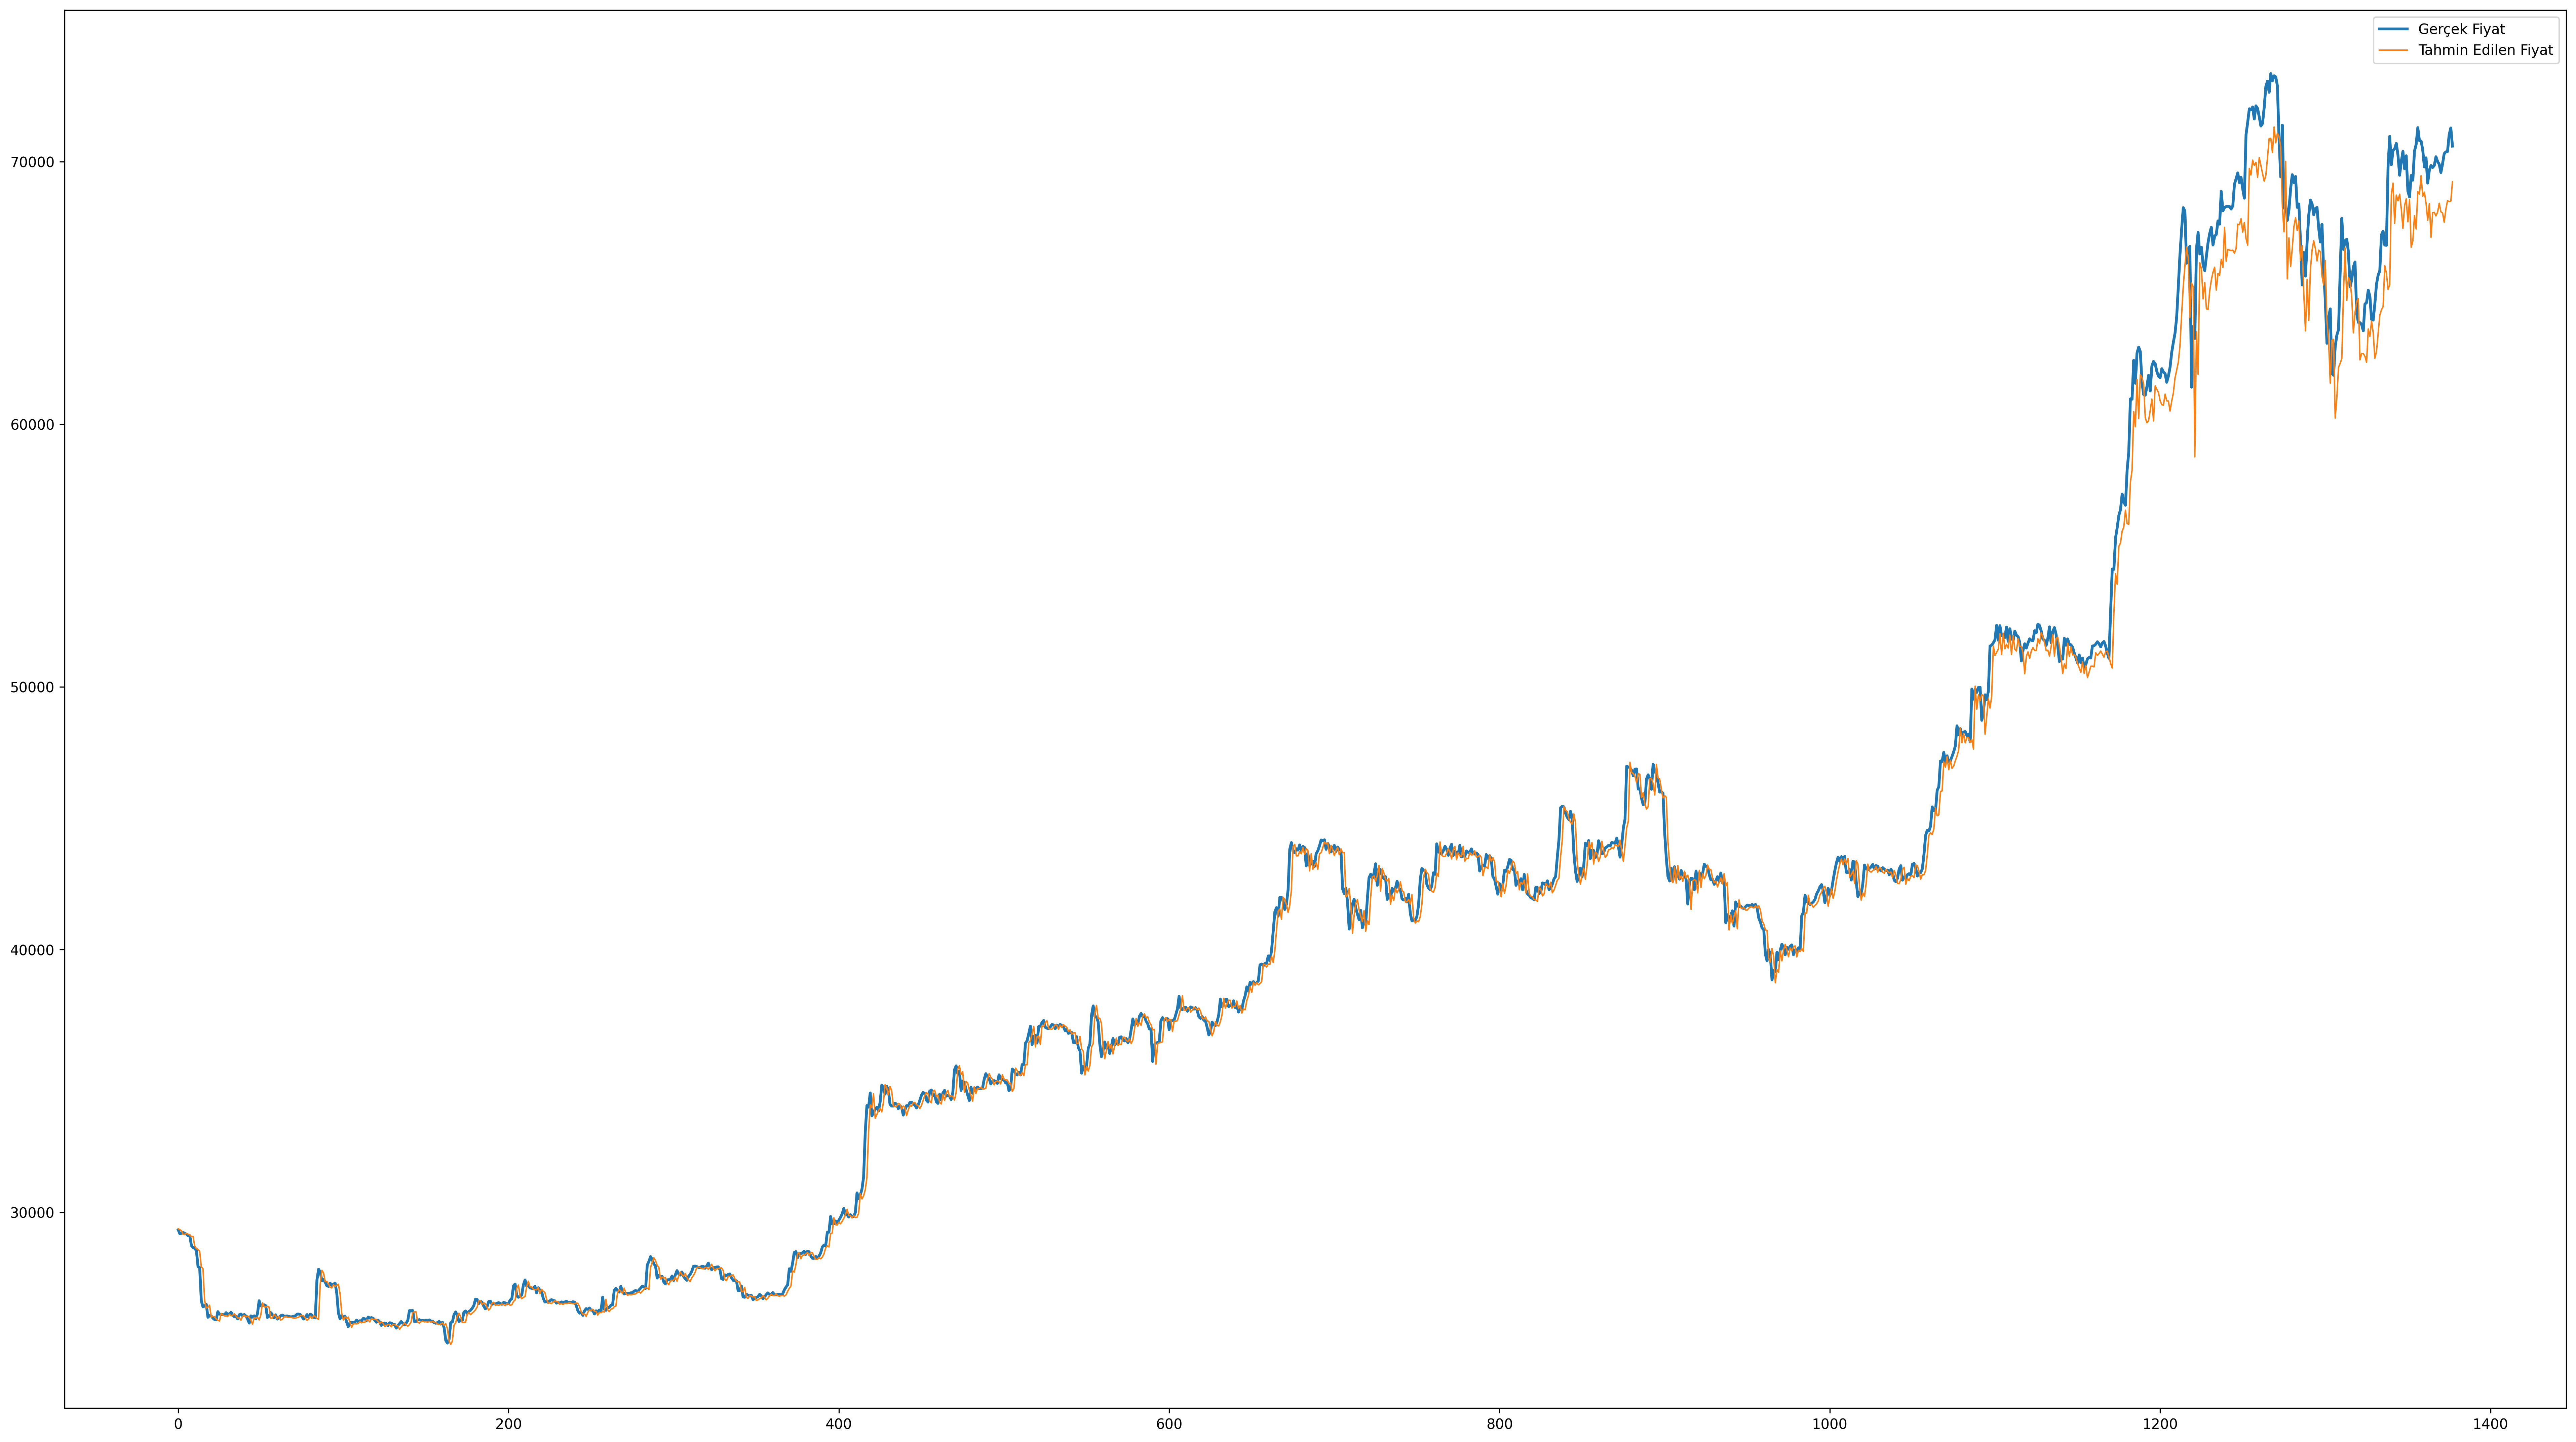

In [ ]:
fiyat = fiyat.short_index()
fiyat_tahmini = fiyat_tahmini.short_index()
# Gerçek ve tahmin edilen fiyatları görselleştirme
plt.figure(figsize=(32,18),dpi=300)

plt.plot(fiyat[train_size + time_step + 1:], label='Gerçek Fiyat',linewidth=2)
plt.plot(fiyat_tahmini, label='Tahmin Edilen Fiyat',linewidth=1)
plt.legend()
plt.show()

In [ ]:
percentage_error = np.mean(np.abs((fiyat[train_size + time_step + 1:] - fiyat_tahmini) / fiyat[train_size + time_step + 1:])) * 100
print("Yüzde Hata:", percentage_error)


Yüzde Hata: 1.1132332545432275


# Yeni Bölüm